<a href="https://colab.research.google.com/github/edquimpo/AP155-DATACAMP_CERTS/blob/main/%5BHX3%5D_QUIMPO_Module5_LabAssignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment** 
## Module 6: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 50 points each).

_Due Date_: **5PM of December 21 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Evanghelos D. Quimpo\
_Student No._: 2020-12067\
_Section_: HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 12/20/2022 (10:05 AM)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Evanghelos D. Quimpo
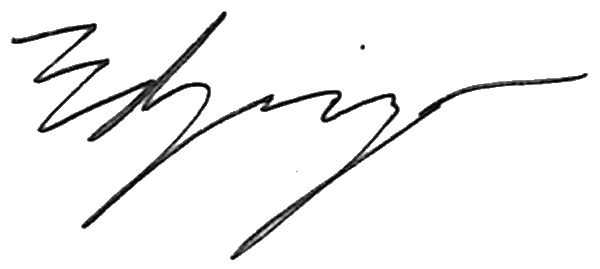


### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (50 pts.; 50/50 for code & discussion) 
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(15 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(10 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(15 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text. 

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(10 pts.)*

1. First, we import the banded.py code from Neumann, which will be very useful later.

In [4]:
######################################################################
#
# Function to solve a banded system of linear equations using
# Gaussian elimination and backsubstitution
#
# x = banded(A,v,up,down)
#
# This function returns the vector solution x of the equation A.x = v,
# where v is an array representing a vector of N elements, either real
# or complex, and A is an N by N banded matrix with "up" nonzero
# elements above the diagonal and "down" nonzero elements below the
# diagonal.  The matrix is specified as a two-dimensional array of
# (1+up+down) by N elements with the diagonals of the original matrix
# along its rows, thus:
#
#   (  -   -  A02 A13 A24 ...
#   (  -  A01 A12 A23 A34 ...
#   ( A00 A11 A22 A33 A44 ...
#   ( A10 A21 A32 A43 A54 ...
#   ( A20 A31 A42 A53 A64 ...
#
# Elements represented by dashes are ignored -- it doesn't matter what
# these elements contain.  The size of the system is taken from the
# size of the vector v.  If the matrix A is larger than NxN then the
# extras are ignored.  If it is smaller, the program will produce an
# error.
#
# The function is compatible with version 2 and version 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, September 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v


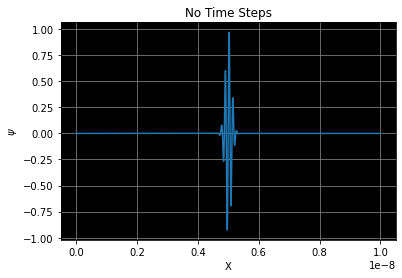

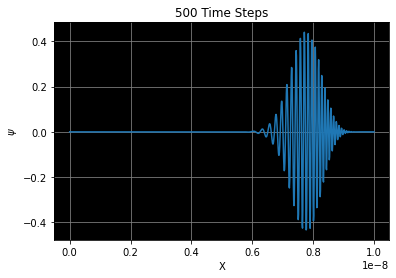

In [5]:
import numpy as np
from numpy import exp, sqrt, linspace, empty, zeros, arange
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

# Define constants.
N = 1000
M = 9.109e-31
L = 1e-8
a = L/N
x0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.0546e-34
h = 1e-18
# Initialize wavefunction.
def psi0(x):
  return exp(-(x-x0)**2/(2*(sigma**2))) * exp(1j*kappa*x)

# Define matrix elements.
a1 = 1 + (h*1j*(hbar/(2*M*(a**2))))
a2 = (-h*1j*(hbar/(4*M*(a**2))))
b1 = 1 - (h*1j*(hbar/(2*M*(a**2))))
b2 = (h*1j*(hbar/(4*M*(a**2))))

# Define x limits.
x = linspace(0, L, N+1)

psi = zeros(N+1, complex)
psi = psi0(x)
psi[[0,N]] = 0

psi1 = zeros(N+1, complex)
psi1 = psi0(x)
psi1[[0,N]] = 0

# Define matrices.
A = zeros((3,N),complex)
A[0, :N] = a2
A[1, :N] = a1
A[2, :N] = a2

v0 = zeros(N+1,complex)

v1 = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
psi1[1:N] = banded(A,v1,1,1)

for i in range(500):
  v0 = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
  psi[1:N] = banded(A,v0,1,1)

fig1,ax1 = plt.subplots()
ax1.plot(x,psi1.real)
ax1.set(facecolor='black')
ax1.set_title("No Time Steps")
ax1.set_xlabel('X')
ax1.set_ylabel('$\psi$')
ax1.grid(color='gray')

fig,ax2 = plt.subplots()
ax2.plot(x,psi.real)
ax2.set(facecolor='black')
ax2.set_title("500 Time Steps")
ax2.set_xlabel('X')
ax2.set_ylabel('$\psi$')
ax2.grid(color='gray')


KeyboardInterrupt: ignored

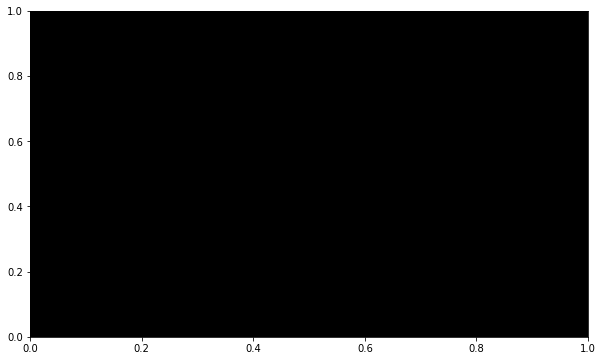

In [3]:
fig, ax = plt.subplots(figsize=(10,6))

def init():
    ax.clear()

def update(frame):
    ax.clear()

    
    psi = zeros(N+1,complex)
    psi = psi0(x)
    psi[[0,N]] = 0

    A = zeros((3,N),complex)
    A[0,:N] = a2
    A[1,:N] = a1
    A[2,:N] = a2

    v0 = zeros(N+1,complex)

    for i in range(frame):
        v0 = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
        psi[1:N] = banded(A,v0,1,1)  
    
    ax.plot(x,psi.real)
    ax.set(facecolor='black',ylim=(-1,1))
    ax.set_title("Wavefunction")
    ax.set_xlabel('X')
    ax.set_ylabel('$\psi$')
    ax.grid(color='gray')

    
anim = FuncAnimation(fig, update, frames = arange(0,3000, 10), init_func = init)

writergif = animation.PillowWriter(fps=10)
anim.save('wavefunction.gif',writer=writergif)

### PROBLEM 2 (50 pts.; 50/50 for code & discussion)

**The Schrodinger equation and the spectral method**

_Refer to Exercise 9.9 in the Newman text._ In this problem, you will use the spectral method to solve the time-dependent Schodinger equation for the same system as in Problem 1, a single particle in one dimension in a box of length $L$ with impenetrable walls. 

To perform the fast transforms needed for this problem, you can use the scipy $\tt fftpack$ package's discrete sine transform $\tt dst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html)) and inverse discrete sine transform $\tt idst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idst.html)). Alternatively, you can use the corresponding functions in the $\tt dcst$ package in Appendix E of the Newman text. 

1. Calculate the values of the coefficients $b_k$ which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i \eta_k$· Divide the box into $N = 1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1$...$N-1$. *(15 pts.)*

2. Putting $b_k = \alpha_k +i \eta_k$ in the solution above and taking the real part we get $ {\rm Re}\ \psi(x_n, t) $ equals
$$\frac{1}{N} \sum_{k=1}^{N-1} \left[\alpha_k \cos\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right) - \eta_k \sin\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right)\right]\sin\left(\frac{\pi kn}{N}\right)$$
for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

   Calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function. *(10 pts.)* 
   
3. Test your program by making a graph of the wavefunction at time $t = 10^{-16}$ s. *(10 pts.)*

4. Make an animation of the wavefunction over time, similar to that described in part (4) of Problem 1 above. A suitable time interval for each frame of the animation is about $10^{-18}$ s. Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(15 pts.)*


First, we import the dcst package in the Newman text.

In [6]:
######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one and two dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#
######################################################################


from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y

Now we can proceed with solving for $b_k$. The equation for energy $E_k$ is given by:

$$E_k = \frac{\pi^2\hbar^2k^2}{2ML^2}$$

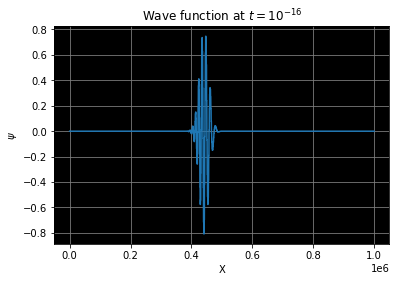

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from numpy import exp, empty, linspace, real, imag, cos, sin, pi, where, arange, zeros


# Define constants.
N = 1000
M = 9.109e-31
L = 1e-8
a = L/N
x0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.0546e-34

# Define x limits.
x = linspace(0, L, N+1)

# Initialize wavefunction.
def psi0(x):
  return exp(-(x-x0)**2/(2*(sigma**2))) * exp(1j*kappa*x)

# Define energy equation.
def E(k):
  return (pi*hbar*k)**2 / (2*M*(L**2))

psi = zeros(N+1, complex)
psi = psi0(x)
psi[[0,N]] = 0

ak = dst(psi.real)
nk = dst(psi.imag)

def sol(t):
  psi_f = []
  for i in x:
    s = 0
    n = where(x==i)
    for k in range(1,N):
      s += (ak[k]*cos(E(k)*t/hbar)-nk[k]*sin(E(k)*t/hbar))*(sin(pi*k*n[0]/N)) / N
      psi_f.append(s)
  return psi_f

t = 1e-16

fig,ax = plt.subplots()
ax.plot(sol(t))
ax.set(facecolor='black')
ax.set_title(r"Wave function at $t = 10^{-16}$")
ax.set_xlabel('X')
ax.set_ylabel('$\psi$')
ax.grid(color='gray')


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

def init():
    ax.clear()

def update(frame):
    ax.clear()
    
    ax.plot(sol(frame))
    ax.set(facecolor='black',ylim=(-1,1))
    ax.set_title("Wavefunction")
    ax.set_xlabel('X')
    ax.set_ylabel('$\psi$')
    ax.grid(color='gray')

    
anim = FuncAnimation(fig, update, frames = arange(0, 1e-16, 1e-18), init_func = init)

writergif = animation.PillowWriter(fps=10)
anim.save('wavefunction2.gif',writer=writergif)